In [1]:
import os
import shutil
import imagej
import scyjava
from scyjava import jimport
import bioformats
import pandas as pd
import numpy as np

In [2]:
try: ij
except NameError: ij = imagej.init('sc.fiji:fiji:2.14.0')

15:41:39.815 [SciJava-10b68723-Thread-0] DEBUG loci.formats.ClassList - Could not find loci.formats.in.URLReader
java.lang.ClassNotFoundException: loci.formats.in.URLReader
	at java.net.URLClassLoader.findClass(URLClassLoader.java:387)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:419)
	at sun.misc.Launcher$AppClassLoader.loadClass(Launcher.java:352)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:352)
	at java.lang.Class.forName0(Native Method)
	at java.lang.Class.forName(Class.java:264)
	at loci.formats.ClassList.parseLine(ClassList.java:196)
	at loci.formats.ClassList.parseFile(ClassList.java:258)
	at loci.formats.ClassList.<init>(ClassList.java:138)
	at loci.formats.ClassList.<init>(ClassList.java:122)
	at loci.formats.ImageReader.getDefaultReaderClasses(ImageReader.java:80)
	at io.scif.bf.BioFormatsFormat.cacheReaderClasses(BioFormatsFormat.java:538)
	at io.scif.bf.BioFormatsFormat.<init>(BioFormatsFormat.java:139)
	at sun.reflect.NativeConstructorAccessorImpl.newInsta

In [22]:
path_image = "/Users/beatrizfernandes/Tese/data/tilescans fragmented/masks/image_001_nuclei3d.tif"
image = ij.io().open(path_image)

16:24:23.755 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.open(DefaultIOService.java:87

[java.lang.Enum.toString] 16:24:23.755 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:864)
	at loci.formats.ImageReader.isThisType(ImageReader.java:259)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:391)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:347)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:323)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:87)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:75)
	at org.scijava.io.IOService.getOpener(IOService.java:62)
	at org.scijava.io.DefaultIOService.ope

In [23]:
def dump_info(image):
    """A handy function to print details of an image object."""
    name = image.name if hasattr(image, 'name') else None # xarray
    if name is None and hasattr(image, 'getName'): name = image.getName() # Dataset
    if name is None and hasattr(image, 'getTitle'): name = image.getTitle() # ImagePlus
    print(f" name: {name or 'N/A'}")
    print(f" type: {type(image)}")
    print(f"dtype: {image.dtype if hasattr(image, 'dtype') else 'N/A'}")
    print(f"shape: {image.shape}")
    print(f" dims: {image.dims if hasattr(image, 'dims') else 'N/A'}")

In [24]:
dump_info(image)

 name: image_001_nuclei3d.tif
 type: <java class 'net.imagej.DefaultDataset'>
dtype: <java class 'net.imglib2.type.numeric.integer.IntType'>
shape: (512, 512, 101)
 dims: ('X', 'Y', 'Unknown')


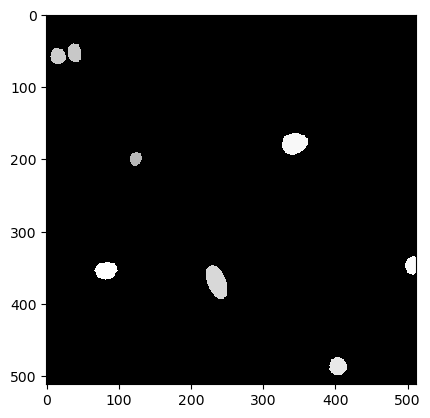

In [25]:
pyimage = ij.py.from_java(image)
ij.py.show(pyimage[20,:,:], cmap='gray')

In [26]:
np.unique(pyimage)

array([ 0,  1,  2,  3,  4,  5,  6, 10, 11, 17, 18, 34, 35, 37, 39, 40, 42,
       43, 45, 46, 50, 51, 54, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 78, 80, 81, 82, 83],
      dtype=int32)

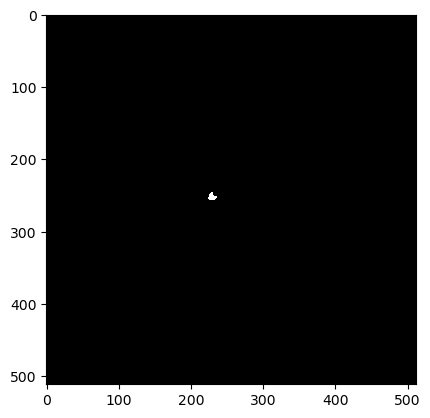

In [31]:
mask_n = 45
ij.py.show(np.array((pyimage==mask_n)*pyimage).sum(axis=0), cmap='gray')